# Part of speech

พาร์ทหลังมิดเทอม

- lexical category
- word class

แต่ละ corpus อาจมีการติด tag ที่แตกต่างกันไป
ตัวอย่าง Tag set
- NN หรือ noun
- VB หรือ Verb

การติด tag ถือว่าเป็นส่วนหนึ่งของการดำเนินงาน nlp pipeline

ตัวอย่างงานที่นำ POS tagging ไปใช้
- text to speech
- translate
- chatbot

จะสอน วิธีการใช้/วิธีการสร้างเอง (create tagger)

คลังที่ติด tag ไว้แล้วและใช้บ่อย คือ nltk.corpus.brown

## วิธีสร้าง Tagger
- default tagger
- regular expression tagger
- uni-gram tagger
- n-gram tagger

## วิธีติด Tag
ใช้ข้อมูลมาจาก upen corpus (University of pensivania / https://www.upenn.edu/)
```python
text  = nltk.word_tokeize("I eat fish")
nltk.post_tag(text)
```

หรือวิธีที่ติด tag ให้กับ string ที่เป็น รูปแบบ "word/tag"
```python
tagged_token = nltk.tag.str2tuple('fly/NN')
```

สำหรับ corpus ที่ติด tag มาแล้ว
```python
nltk.corpus.brown.tagged_words()
```




In [3]:
import nltk
text = nltk.word_tokenize("And now for something completely difference")
print(nltk.pos_tag(text))

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('difference', 'NN')]


In [5]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [6]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [7]:
nltk.help.upenn_tagset('NN.*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


### การดูว่าบริบทคล้ายกัน
แบบง่าย ใช้ .similar ถ้าไม่มี pos tag ช่วย

### Corpus ที่ติด tag ให้
- brown
- conll2000 (ภาษาสเปน, เป็น tagset พิเศษ)
- treebank 

In [9]:
#การแปลง tagset จาก upen เป็น universal
nltk.corpus.treebank.tagged_words(tagset='universal')[:10]

[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET')]

## Frequncy Distribution with tagged corpora

In [10]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news',tagset='universal')
tag_fd = nltk.FreqDist(tag for (word,tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

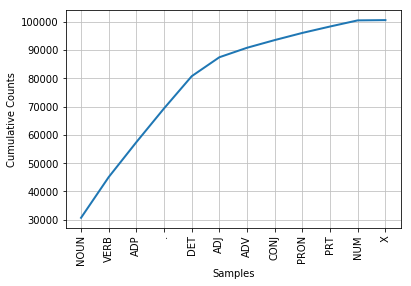

In [11]:
tag_fd.plot(cumulative=True)

## แอปสำเร็จรูป

In [15]:
import nltk
nltk.app.concordance()

In [19]:
brown_news_tagged = nltk.corpus.brown.tagged_words(tagset = 'universal')
word_tag_pairs = list(nltk.bigrams(brown_news_tagged))
print(word_tag_pairs[:5])
noun_preceders = [a[1] for (a,b) in word_tag_pairs if b[1] == 'NOUN']
print(noun_preceders[:20])
fdist = nltk.FreqDist(noun_preceders)
print([tag for (tag,_) in fdist.most_common()])

[(('The', 'DET'), ('Fulton', 'NOUN')), (('Fulton', 'NOUN'), ('County', 'NOUN')), (('County', 'NOUN'), ('Grand', 'ADJ')), (('Grand', 'ADJ'), ('Jury', 'NOUN')), (('Jury', 'NOUN'), ('said', 'VERB'))]
['DET', 'NOUN', 'ADJ', 'VERB', 'DET', 'ADP', 'ADJ', 'NOUN', 'DET', 'DET', 'VERB', 'DET', 'ADP', 'NOUN', 'DET', 'ADJ', 'ADJ', 'DET', 'DET', 'CONJ']
['DET', 'ADJ', 'NOUN', 'ADP', '.', 'VERB', 'CONJ', 'NUM', 'ADV', 'PRT', 'PRON', 'X']


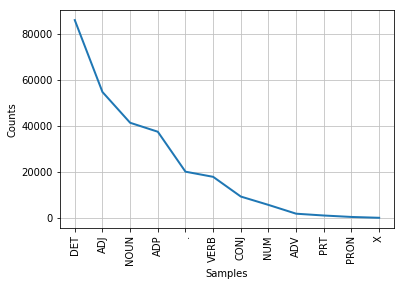

[('DET', 85845),
 ('ADJ', 54653),
 ('NOUN', 41309),
 ('ADP', 37418),
 ('.', 20084),
 ('VERB', 17851),
 ('CONJ', 9294),
 ('NUM', 5668),
 ('ADV', 1851),
 ('PRT', 1068),
 ('PRON', 440),
 ('X', 77)]

In [20]:
fdist.plot()
fdist.most_common()

In [23]:
#Quest อยากได้ว่าคำอะไรที่ตามหลัง ... preposition(ADP)
brown_news_tagged = nltk.corpus.brown.tagged_words(tagset = 'universal')
word_tag_pairs = list(nltk.bigrams(brown_news_tagged))
noun_preceders = [b[1] for (a,b) in word_tag_pairs if a[1] == 'ADP'] 
fdist = nltk.FreqDist(noun_preceders)
fdist.most_common(1)


[('DET', 65962)]

In [32]:
##การบ้าน  ให้นับ taggedword

wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist([(w[0].lower(),w[1]) for w in wsj  if w[1] != '.' and w[1] != 'NUM' and w[1] != 'X'])
print(word_tag_fd[('is','VERB')])
print(word_tag_fd.most_common(50))

672
[(('the', 'DET'), 4753), (('of', 'ADP'), 2325), (('to', 'PRT'), 2179), (('a', 'DET'), 1979), (('in', 'ADP'), 1749), (('and', 'CONJ'), 1549), (('for', 'ADP'), 851), (("'s", 'PRT'), 761), (('is', 'VERB'), 672), (('said', 'VERB'), 628), (('it', 'PRON'), 577), (('that', 'ADP'), 514), (('on', 'ADP'), 500), (('%', 'NOUN'), 445), (('by', 'ADP'), 438), (('at', 'ADP'), 430), (('with', 'ADP'), 398), (('from', 'ADP'), 391), (('mr.', 'NOUN'), 375), (('was', 'VERB'), 367), (('are', 'VERB'), 367), (('as', 'ADP'), 362), (('be', 'VERB'), 356), (('its', 'PRON'), 343), (('has', 'VERB'), 339), (('an', 'DET'), 335), (('that', 'DET'), 331), (("n't", 'ADV'), 325), (('have', 'VERB'), 323), (('but', 'CONJ'), 307), (('he', 'PRON'), 303), (('or', 'CONJ'), 294), (('will', 'VERB'), 280), (('they', 'PRON'), 263), (('company', 'NOUN'), 260), (('this', 'DET'), 224), (('which', 'DET'), 224), (('u.s.', 'NOUN'), 220), (('says', 'VERB'), 217), (('year', 'NOUN'), 214), (('would', 'VERB'), 209), (('were', 'VERB'), 197

In [34]:
## หาคำเฉพาะที่เป็น DET
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist([(w[0].lower(),w[1]) for w in wsj  if w[1] == 'DET'])
print(word_tag_fd.most_common(50))

[(('the', 'DET'), 4753), (('a', 'DET'), 1979), (('an', 'DET'), 335), (('that', 'DET'), 331), (('this', 'DET'), 224), (('which', 'DET'), 224), (('some', 'DET'), 144), (('all', 'DET'), 113), (('any', 'DET'), 106), (('there', 'DET'), 88), (('no', 'DET'), 86), (('these', 'DET'), 77), (('those', 'DET'), 61), (('another', 'DET'), 48), (('each', 'DET'), 46), (('both', 'DET'), 44), (('every', 'DET'), 21), (('half', 'DET'), 14), (('neither', 'DET'), 12), (('such', 'DET'), 7), (('either', 'DET'), 5), (('what', 'DET'), 3), (('la', 'DET'), 1), (('le', 'DET'), 1), (('del', 'DET'), 1), (('whichever', 'DET'), 1)]


In [38]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist([(tag,word) for (word,tag) in wsj])
print(len(cfd2['VBN']), list(cfd2['VBN']))

692 ['named', 'used', 'caused', 'exposed', 'reported', 'replaced', 'sold', 'died', 'expected', 'diagnosed', 'studied', 'industrialized', 'owned', 'found', 'classified', 'rejected', 'outlawed', 'imported', 'tracked', 'thought', 'considered', 'elected', 'based', 'lifted', 'ensnarled', 'voted', 'been', 'held', 'banned', 'renovated', 'prolonged', 'recorded', 'accumulated', 'offered', 'become', 'guaranteed', 'proposed', 'related', 'improved', 'worried', 'cluttered', 'expedited', 'retired', 'ordered', 'collected', 'required', 'received', 'moved', 'determined', 'made', 'changed', 'completed', 'disputed', 'refunded', 'estimated', 'compared', 'located', 'filed', 'scrapped', 'anticipated', 'priced', 'set', 'applied', 'existed', 'incurred', 'reached', 'Regarded', 'paid', 'trained', 'instituted', 'vowed', 'deemed', 'combined', 'removed', 'concerned', 'complained', 'accelerated', 'believed', 'called', 'solved', 'forgiven', 'launched', 'built', 'preferred', 'raised', 'scheduled', 'brought', 'increas

In [83]:
# ข้อ 15.2 คำที่มีติด tag มากที่สุดคือคำว่าอะไร

freq2D = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words())
sortedDist = sorted([(name,len(freq2D[name])) for name in freq2D.keys()], key=lambda x: x[1],reverse=True)
print(sortedDist[0][0])
print(freq2D[sortedDist[0][0]].keys())

that
dict_keys(['CS', 'WPS', 'DT', 'QL', 'WPO', 'CS-HL', 'DT-NC', 'NIL', 'WPS-NC', 'WPO-NC', 'CS-NC', 'WPS-HL'])


In [84]:
# ข้อ 15.2 คำที่มีติด tag มากที่สุดคือคำว่าอะไร (Universal tag)

freq2D = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words(tagset='universal'))
sortedDist = sorted([(name,len(freq2D[name])) for name in freq2D.keys()], key=lambda x: x[1],reverse=True)
print(sortedDist[0][0])
print(freq2D[sortedDist[0][0]].keys())

that
dict_keys(['ADP', 'PRON', 'DET', 'ADV', 'X'])


In [86]:
# ข้อ 15.4 tag ที่ตามหลังคำนามเยอะที่สุด
brown_news_tagged = nltk.corpus.brown.tagged_words(tagset = 'universal')
word_tag_pairs = list(nltk.bigrams(brown_news_tagged))
noun_preceders = [b[1] for (a,b) in word_tag_pairs if a[1] == 'NOUN'] 
fdist = nltk.FreqDist(noun_preceders)
print(fdist.most_common(5))


[('.', 78326), ('ADP', 67460), ('VERB', 43819), ('NOUN', 41309), ('CONJ', 16451)]


In [94]:
# ข้อ 15.2 แบบอาจารย์
brown_news_tagged = nltk.corpus.brown.tagged_words(tagset = 'universal')
data = nltk.ConditionalFreqDist((word.lower(), tag) for word,tag in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 4:
        print(word)

damn
down
round
that
to
well


In [ ]:
#18 คำไหนกำกวม (ติด tag มากกว่า 2 อันขึ้นไป)
freq2D = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words(tagset='universal'))
gamgum = [(name,len(freq2D[name])) for name in freq2D.keys() if len(freq2D[name]) >= 2]
print("คำที่กำกวม", len(gamgum))
print("คำที่ไม่กำกวม", len(freq2D.keys())- len(gamgum))
